In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam
import import_ipynb

# Import datasets
import dataAcq as da

importing Jupyter notebook from dataAcq.ipynb


In [2]:
da.eng20 = da.eng20[['HomeTeam','AwayTeam','FTHG','FTAG']]
da.eng20.head()

,HomeTeam,AwayTeam,FTHG,FTAG
0,Liverpool,Norwich,4,1
1,West Ham,Man City,0,5
2,Bournemouth,Sheffield United,1,1
3,Burnley,Southampton,3,0
4,Crystal Palace,Everton,0,0


In [3]:
# Remove last 10 rows for modelling
dEng = da.eng20[:-10]
dEng.mean()

FTHG    1.508108
FTAG    1.197297
dtype: float64

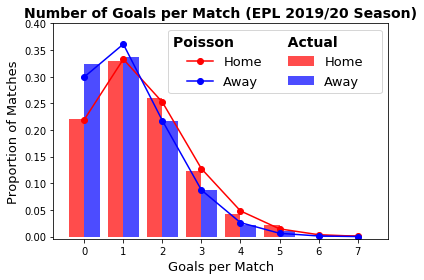

In [7]:
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, da.eng20.mean()[j]) for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(da.eng20[['FTHG', 'FTAG']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],density=True, color=["RED", "BLUE"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = 'RED')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = 'BLUE')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2019/20 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [8]:
# probability of draw between home and away team
skellam.pmf(0.0, da.eng20.mean()[0], da.eng20.mean()[1])

0.2534527280263352

In [9]:
# probability of home team winning by one goal
skellam.pmf(1, da.eng20.mean()[0], da.eng20.mean()[1])

0.22324018751830582

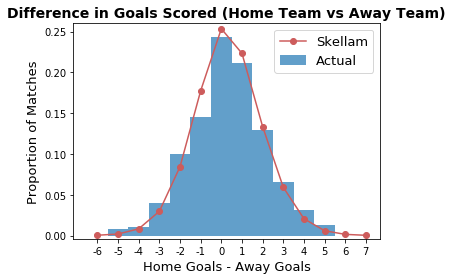

In [10]:
# Skellam distribution of home vs away goal
skellam_pred = [skellam.pmf(i,  da.eng20.mean()[0],  da.eng20.mean()[1]) for i in range(-6,8)]

plt.hist(da.eng20[['FTHG']].values - da.eng20[['FTAG']].values, range(-6,8), 
         alpha=0.7, label='Actual',density=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

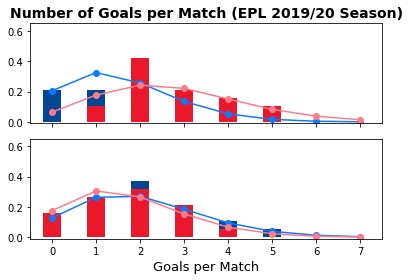

In [11]:
fig,(ax1,ax2) = plt.subplots(2, 1)

che_home = da.eng20[da.eng20['HomeTeam']=='Chelsea'][['FTHG']].apply(pd.value_counts,normalize=True)
che_home_pois = [poisson.pmf(i,np.sum(np.multiply(che_home.values.T,che_home.index.T),axis=1)[0]) for i in range(8)]
liv_home = da.eng20[da.eng20['HomeTeam']=='Liverpool'][['FTHG']].apply(pd.value_counts,normalize=True)
liv_home_pois = [poisson.pmf(i,np.sum(np.multiply(liv_home.values.T,liv_home.index.T),axis=1)[0]) for i in range(8)]

che_away = da.eng20[da.eng20['AwayTeam']=='Chelsea'][['FTAG']].apply(pd.value_counts,normalize=True)
che_away_pois = [poisson.pmf(i,np.sum(np.multiply(che_away.values.T,che_away.index.T),axis=1)[0]) for i in range(8)]
liv_away = da.eng20[da.eng20['AwayTeam']=='Liverpool'][['FTAG']].apply(pd.value_counts,normalize=True)
liv_away_pois = [poisson.pmf(i,np.sum(np.multiply(liv_away.values.T,liv_away.index.T),axis=1)[0]) for i in range(8)]

ax1.bar(che_home.index,che_home['FTHG'],width=0.4,color="#034694",label="Chelsea")
ax1.bar(liv_home.index,liv_home['FTHG'],width=0.4,color="#EB172B",label="Liverpool")
pois1, = ax1.plot([i for i in range(8)], che_home_pois,
                  linestyle='-', marker='o',label="Chelsea", color = "#0a7bff")
pois1, = ax1.plot([i for i in range(8)], liv_home_pois,
                  linestyle='-', marker='o',label="Liverpool", color = "#ff7c89")
# leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
# leg.set_title("Poisson                 Actual                ", prop = {'size':'14', 'weight':'bold'})
ax1.set_xlim([-0.5,7.5])
ax1.set_ylim([-0.01,0.65])
ax1.set_xticklabels([])
# mimicing the facet plots in ggplot2 with a bit of a hack
# ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
#         bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})
# ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
#         bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})

ax2.bar(che_away.index,che_away['FTAG'],width=0.4,color="#034694",label="Chelsea")
ax2.bar(liv_away.index,liv_away['FTAG'],width=0.4,color="#EB172B",label="Liverpool")
pois1, = ax2.plot([i for i in range(8)], che_away_pois,
                  linestyle='-', marker='o',label="Chelsea", color = "#0a7bff")
pois1, = ax2.plot([i for i in range(8)], liv_away_pois,
                  linestyle='-', marker='o',label="Liverpool", color = "#ff7c89")
ax2.set_xlim([-0.5,7.5])
ax2.set_ylim([-0.01,0.65])
ax1.set_title("Number of Goals per Match (EPL 2019/20 Season)",size=14,fontweight='bold')
ax2.set_xlabel("Goals per Match",size=13)
# ax2.text(-1.15, 0.9, 'Proportion of Matches', rotation=90, size=13)
plt.tight_layout()
plt.show()

In [12]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([da.eng20[['HomeTeam','AwayTeam','FTHG']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','FTHG':'goals'}),
           da.eng20[['AwayTeam','HomeTeam','FTAG']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','FTAG':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1057.7
Date:                Wed, 30 Dec 2020   Deviance:                       765.20
Time:                        15:14:46   Pearson chi2:                     655.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1957      0.202      0.967      0.334      -0.201       0.593
team[T.Aston Villa]             -0.2932      0.206     -1.424      0.154      -0.697       0.110
team[T.Bournemouth]             -0.3200      0.207     -1.544      0.123      -0.726       0.086
team[T.Brighton]                -0.3566      0.209     -1.708      0.088      -0.766       0.053
team[T.Burnley]                 -0.2628      0.203     -1.294      0.196      -0.661       0.135
team[T.Chelsea]                  0.2157      0.180      1.197      0.231      -0.137       0.569
team[T.Crystal Palace]          -0.5906      0.224     -2.636      0.008      -1.030      -0.151
team[T.Everton]                 -0.2336      0.202     -1.158      0.247      -0.629       0.162
team[T.Leicester]                0.1727      0.181      0.952      0.341      -0.183       0.528
team[T.Liverpool]                0.4031      0.172      2.339      0.019       0.065       0.741
team[T.Man City]                 0.5881      0.167      3.530      0.000       0.262       0.915
team[T.Man United]               0.1525      0.182      0.838      0.402      -0.204       0.509
team[T.Newcastle]               -0.3786      0.210     -1.799      0.072      -0.791       0.034
team[T.Norwich]                 -0.7416      0.238     -3.121      0.002      -1.207      -0.276
team[T.Sheffield United]        -0.3716      0.209     -1.780      0.075      -0.781       0.038
team[T.Southampton]             -0.0815      0.194     -0.420      0.674      -0.461       0.298
team[T.Tottenham]                0.0847      0.185      0.457      0.647      -0.279       0.448
team[T.Watford]                 -0.4266      0.214     -1.995      0.046      -0.846      -0.007
team[T.West Ham]                -0.1195      0.196     -0.610      0.542      -0.504       0.264
team[T.Wolves]                  -0.1019      0.194     -0.526      0.599      -0.482       0.278
opponent[T.Aston Villa]          0.3191      0.189      1.685      0.092      -0.052       0.690
opponent[T.Bournemouth]          0.2876      0.191      1.509      0.131      -0.086       0.661
opponent[T.Brighton]             0.1008      0.199      0.507      0.612      -0.289       0.490
opponent[T.Burnley]              0.0277      0.202      0.137      0.891      -0.369       0.424
opponent[T.Chelsea]              0.1316      0.199      0.663      0.508      -0.258       0.521
opponent[T.Crystal Palace]       0.0156      0.202      0.077      0.938      -0.381       0.412
opponent[T.Everton]              0.1423      0.197      0.722      0.470      -0.244       0.528
opponent[T.Leicester]           -0.1468      0.213     -0.689      0.491      -0.564       0.271
opponent[T.Liverpool]           -0.3459      0.226     -1.527      0.127    

In [13]:
# Number of goals prediction
poisson_model.predict(pd.DataFrame(data={'team': 'Chelsea', 'opponent': 'Liverpool', 'home':0},index=[1]))

1    1.067708
dtype: float64

In [14]:
# Calculate the probability of various events
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'Chelsea', 'Liverpool', max_goals=3)

array([[0.03275242, 0.06799351, 0.07057673, 0.04883872],
       [0.04397976, 0.09130129, 0.09477002, 0.06558035],
       [0.02952788, 0.06129942, 0.06362831, 0.04403046],
       [0.01321662, 0.0274375 , 0.02847991, 0.01970795]])

In [15]:
match_pred = simulate_match(poisson_model, "Chelsea", "Liverpool", max_goals=10)
# Home win
np.sum(np.tril(match_pred, -1))

0.24526697076118079

In [16]:
# Draw
np.sum(np.diag(match_pred))

0.21123788638610816

In [17]:
# Away win
np.sum(np.triu(match_pred, 1))

0.5434832638456422